## [scikit learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
-----



### Scikit learn 설치
#### 1. 의존성

* Python
* Numpy
* SciPy
* joblib

#### 2. 설치

In [7]:
import numpy as np
print(np.__version__)

1.20.1


In [ ]:
#pip install scikit-learn
!conda install scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)

## 데이터 표현

-----

### 1. [scikit-learn의 API들](https://scikit-learn.org/stable/modules/classes.html)
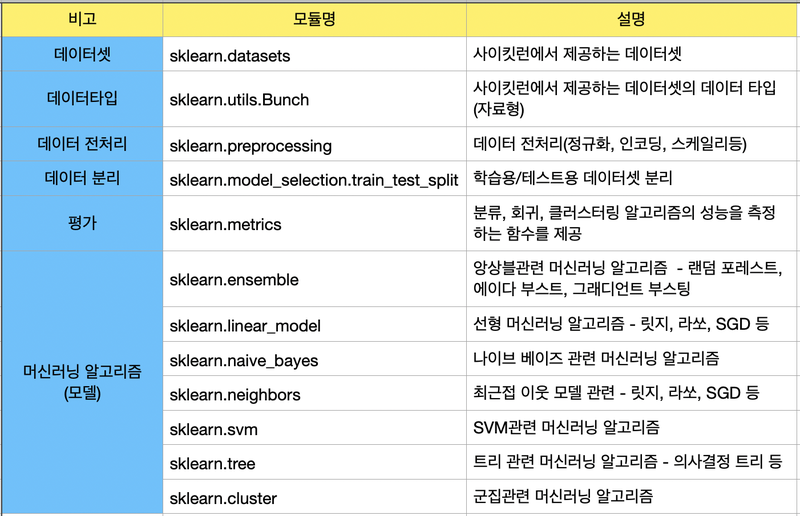

### core API: ```transformer()```, ```fit()```, ```predict()```

### ```metrics``` : 평가와 관련된 항목들   

### ```sklearn.preprocessing``` : 중요한 모듈 중 하나

<br>


### 1. 특성행렬과 타겟벡터

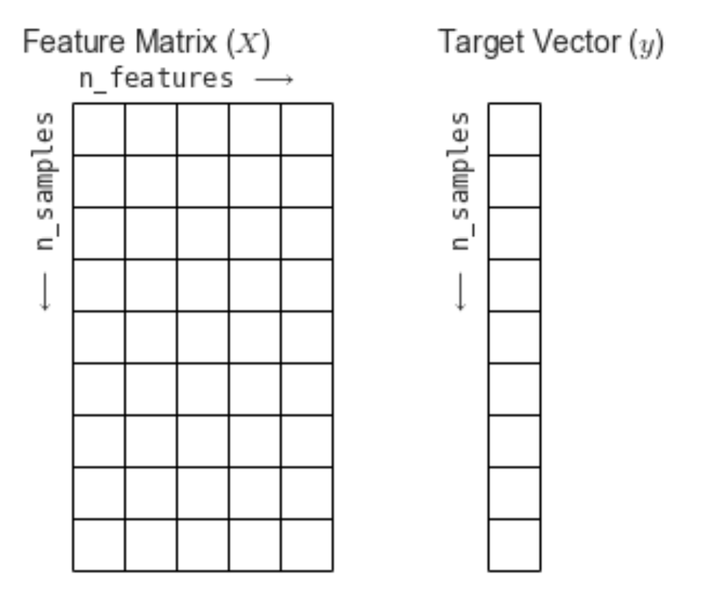



#### 1) 특성행렬(Feature Matrix) 
* 입력 데이터를 의미합니다.
* 특성(feature): 데이터에서 수치 값, 이산 값, 불리언 값으로 표현되는 개별 관측치를 의미합니다. 특성 행렬에서는 열에 해당하는 값입니다.
* 표본(sample): 각 입력 데이터, 특성 행렬에서는 행에 해당하는 값입니다.
* ```n_samples```: 행의 개수(표본의 개수)
* ```n_features```: 열의 개수(특성의 개수)
* ```X```: 통상 특성 행렬은 변수명 X로 표기합니다.
* ```[n_samples, n_features]```은 [행, 열]형태의 2차원 배열 구조를 사용하며 이는 NumPy의 ndarray, Pandas의 DataFrame, SciPy의 Sparse Matrix를 사용하여 나타낼 수 있습니다.

#### 2) 타겟 벡터 (Target Vector)

* 입력 데이터의 **라벨(정답)** 을 의미합니다.
* 목표(Target): 라벨, 타겟값, 목표값이라고도 부르며 특성 행렬(Feature Matrix)로부터 예측하고자 하는 것을 말합니다.
* ```n_samples```: 벡터의 길이(라벨의 개수)
* 타겟 벡터에서 ```n_features```는 없습니다.
* ```y```: 통상 타겟 벡터는 변수명 y로 표기합니다.
* 타겟 벡터는 보통 1차원 벡터로 나타내며, 이는 NumPy의 ndarray, Pandas의 Series를 사용하여 나타낼 수 있습니다.
* (단, 타겟 벡터는 경우에 따라 1차원으로 나타내지 않을 수도 있습니다. 이 노드에서 사용되는 예제는 모두 1차원 벡터입니다.)

> 특성행렬 X의 n_samples와 타겟벡터 y의 n_samples는 동일해야 합니다.

## 회귀모델 실습
-----


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

In [ ]:
# 입력데이터 x의 모양 확인
x.shape

In [ ]:
# 입력데이터 y의 모양 확인
y.shape

둘 다 1차원 벡터

### 사이킷런에서 모델 객체 생성 (-> 머신러닝 모델 사용)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 선형회귀모델 생성
model

### ```fit()``` 메소드로 모델 훈련 

In [ ]:
# fit()메소드의 인자에 특성행렬(입력데이터), 타겟벡터(라벨) 넘김

model.fit(x,y) # ! 에러발생

#### x를 행렬로 바꾸어주지 않았기 때문에 에러 발생

### ```reshape()```로 x를 Numpy.ndarray 타입으로 변환

In [ ]:
X = x.reshape(100,1)

In [ ]:
# 변경된 입력값으로 모델 훈련
model.fit(X,y)

### ```np.linspace()```로 새로운 데이터를 넣고, ```predict()```로 예측

In [ ]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

### ```reshape()```에서 나머지 숫자를 -1로 넣으면 자동으로 남은 숫자 계산

In [ ]:
X_ = x_new.reshape(-1, 1)
X_.shape

### ```sklearn.metrics``` 모듈로 학습된 모델의 성능평가

### 회귀모델의 경우 RSME(Root Mean Square Error)

In [11]:
from sklearn.metrics import mean_squared_error

# 직접구현
error = mean_squared_error(y,y_new, squared=False)

print(error)

9.299028215052264


### 회귀모델 결과 그래프로 시각화

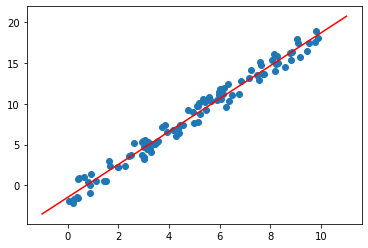

In [12]:
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

## [datasets 모듈](https://scikit-learn.org/stable/datasets)
-----

### ```sklearn.datasets```의 구성
1. 크게 **dataset loaders**와 **dataset fetchers**로 나뉜다.   
2. 각각,```Toy dataset```과 ```Real World dataset```을 제공
3. ```Toy dataset``` 예시
* ```datasets.load_boston()```: 회귀 문제, 미국 보스턴 집값 예측
* ```datasets.load_breast_cancer()```: 분류 문제, 유방암 판별
* ```datasets.load_digits()```: 분류 문제, 0 ~ 9 숫자 분류
* ```datasets.load_iris()```: 분류 문제, iris 품종 분류
* ```datasets.load_wine()```: 분류 문제, 와인 분류

### ```datasets.load_wine()``` 뜯어보기

In [1]:
from sklearn.datasets import load_wine
data = load_wine()
type(data)

sklearn.utils.Bunch

#### [sklearn.utils.Bunch 문서](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html?highlight=bunch#sklearn.utils.Bunch) 
python 딕셔너리와 유사하다

In [24]:
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [2]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

### 1. ```data```
#### 특성행렬(입력값)

In [3]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

* 2차원
* 행에 데이터 개수(```n_samples```)
* 열에 특성의 개수(```n_features```) 

In [4]:
data.data.shape

(178, 13)

데이터 178개, 특성 13개

In [5]:
data.data.ndim

2

2차원

### 2-1. ```target```
#### 타겟벡터(라벨)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

1차원 벡터

In [7]:
data.target.shape

(178,)

#### 타겟 벡터의 길이는 특성행렬의 데이터 개수와 일치해야 한다.

### 2-2. ```feature_names```

In [8]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

#### ```feature_names```길이 확인 

In [9]:
len(data.feature_names)

13

#### ```feature_names```의 개수와 특성행렬의 ```n_features```(열)의 숫자 일치

### 3.```target_names```

In [10]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

#### 데이터를 각각 ```class_0```, ```class_1```, ```class_2```로 분류한다는 뜻

### 4. ```DESCR```(Describe)
데이터에 대한 설명 [사이킷런 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html?highlight=wine#sklearn.datasets.load_wine)의 내용과 일치

In [11]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 데이터셋 이용한 분류 문제 실습
-----

In [12]:
# !pip install pandas

import pandas as pd
pd.DataFrame(data.data, columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### EDA(Exploration Dta Analysis)과정에서 매우 편리해진다

## 머신러닝
-----

In [13]:
X = data.data
y = data.target

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [15]:
model.fit(X,y)

RandomForestClassifier()

In [16]:
y_pred = model.predict(X)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 타겟 벡터 y와 예측값 y_pred 인자로 기입
print(classification_report(y, y_pred))
# 정확도 출력
print("accuracy =", accuracy_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy = <function accuracy_score at 0x000002735408ADC0>


### 왜 정확도가 100% 인지는 아래에서 보자

## ```Estimator```
-----

### 와인분류 문제 해결 과정 그림
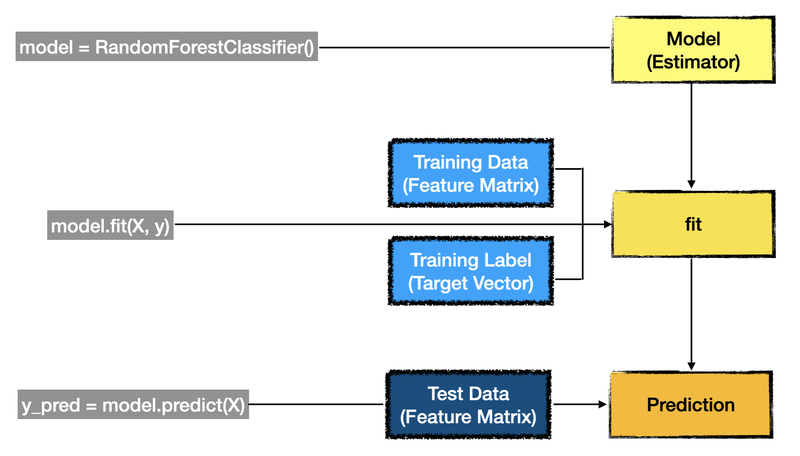


### 선형회귀 문제 해결 과정 그림
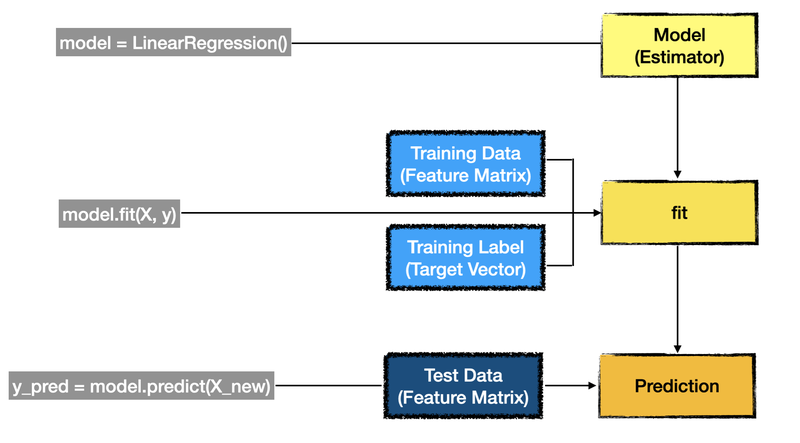


### 타겟벡터 없을 때(비지도 학습 )
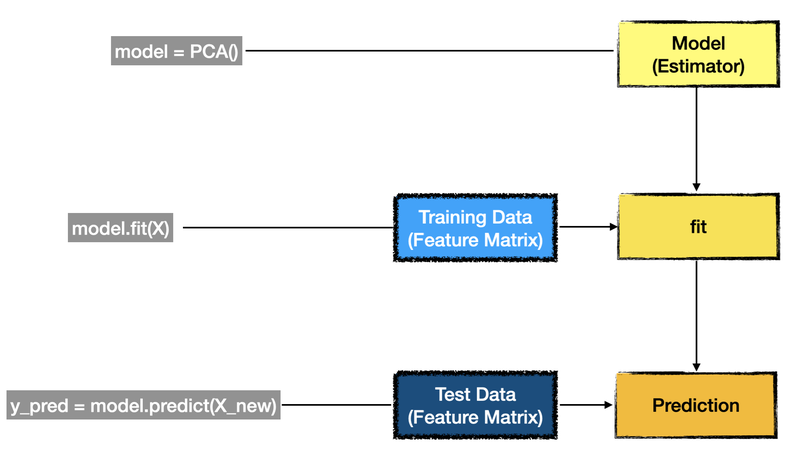

### 결론: ```Estimator```사용하면 지도, 비지도 모두 사용가능 하다.

## 테스트 데이터와 훈련데이터 분류하기 
----- 

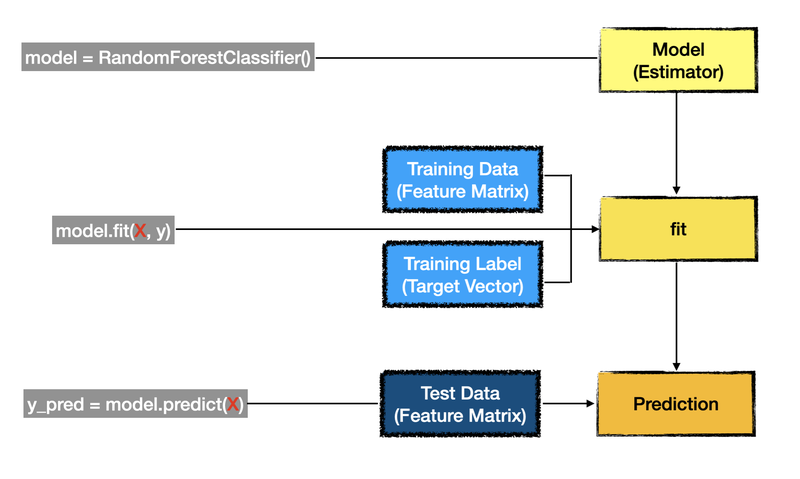

Estimator.fit(**X**,y), Estimator.predict(**x**)

#### 즉 fit과 predict는 다른 데이터가 들어간다.


#### 아래처럼 fit에는 훈련 데이터, predcit에는 테스트 데이터가 들어간다

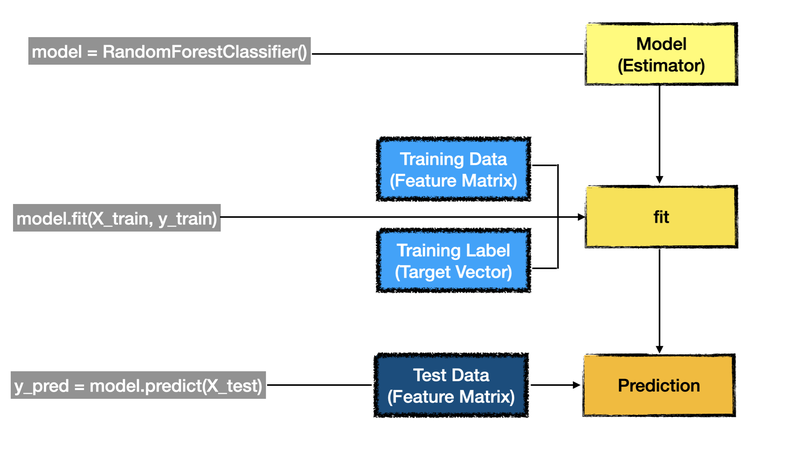

### 앞서 정확도가 100%로 나온 것은 훈련데이터를 그대로 테스트 데이터로 썼기 때문

In [18]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


### 전체 데이터 178개를 8:2로 특성행렬:타겟벡터로 나누기

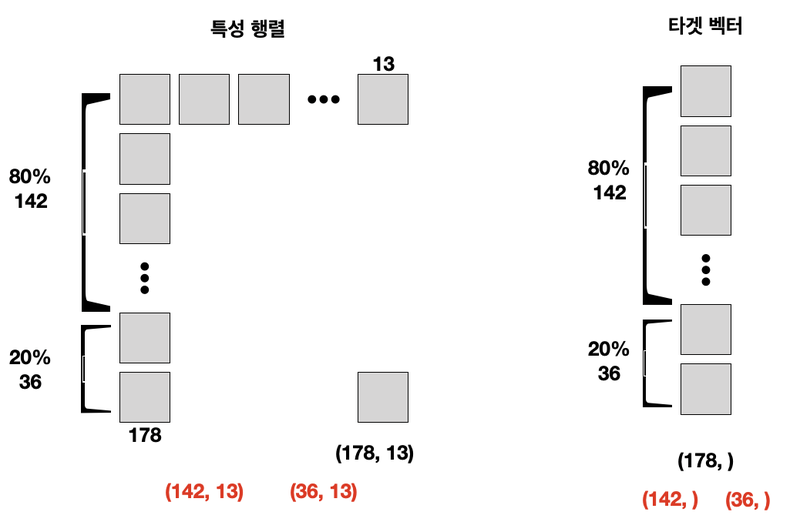

### 

### 훈련데이터와 예제 데이터 분리

In [19]:
X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [25]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
(142,) (36,)


### 훈련데이터와 예제데이터 분리후 다시 훈련/예측

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.9444444444444444


In [53]:
print(y_train)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.284e+01 2.960e+00 2.610e+00 ... 8.900e-01 2.150e+00 5.900e+02]
 [1.293e+01 2.810e+00 2.700e+00 ... 7.700e-01 2.310e+00 6.000e+02]
 [1.336e+01 2.560e+00 2.350e+00 ... 7.000e-01 2.470e+00 7.800e+02]]


### ```train_test_split()``` 사용해서 분리하기

In [31]:
from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

#### ```train_test_split``` 인자설명
* ```X```: 특성행렬
* ```y```: 타겟벡터
* ```test_size``` : 테스트 데이터의 비율
* ```random_state``` : seed 번호 입력받아 데이터를 랜덤하게 섞어준다.

In [33]:
print(type(result))
print(len(result))

<class 'list'>
4


#### array타입 원소 4개를 가진 리스트 반환

In [34]:
# 훈련 데이터용 특성행렬 출력
result[0].shape

(142, 13)

In [35]:
# 테스트 데이터용 특성행렬 출력
result[1].shape

(36, 13)

In [36]:
# 훈련 데이터용 타겟 벡터
result[2].shape

(142,)

In [37]:
# 테스트 데이터용 타겟 벡터
result[3].shape

(36,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# 데이터셋 로드하기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

data = load_wine()
X = data.data
y = data.target

# 훈련용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11) # test_size와 random_state에 따라 정답률도 변화한다
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 훈련하기
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측하기
y_pred = model.predict(X_test)

# 정답률 출력하기
print("정답률=", accuracy_score(y_test, y_pred))

(124, 13) (54, 13) (124,) (54,)
정답률= 0.9444444444444444
